<a href="https://colab.research.google.com/github/Agim-dudu/Agim-dudu/blob/main/image_steganografi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RGB to Greyscale
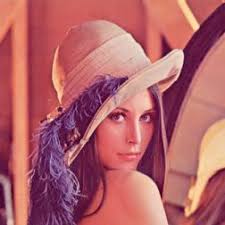

In [16]:
# Convert RGB image to greyscale using the average method.
def average_method(image):
    np_image = np.array(image)
    greyscale = np.mean(np_image, axis=2).astype(np.uint8)
    return Image.fromarray(greyscale)

In [17]:
# Convert RGB image to greyscale using the luminosity method.
def luminosity_method(image):
    np_image = np.array(image)
    greyscale = (0.21 * np_image[:,:,0] + 0.72 * np_image[:,:,1] + 0.07 * np_image[:,:,2]).astype(np.uint8)
    return Image.fromarray(greyscale)

In [18]:
# Convert RGB image to greyscale using the lightness method.
def lightness_method(image):
    np_image = np.array(image)
    greyscale = (np.max(np_image, axis=2) + np.min(np_image, axis=2)) / 2
    return Image.fromarray(greyscale.astype(np.uint8))

In [19]:
# Convert RGB image to greyscale using a single color channel.
def single_channel_method(image, channel):
    np_image = np.array(image)
    greyscale = np_image[:,:,channel]
    return Image.fromarray(greyscale)

In [20]:
def rgb_to_greyscale(image):
    return image.convert("L")

# Encode dan Decode Gambar

In [10]:
def encode_message(image, message):
    """Encode a message into the greyscale image using LSB steganography."""
    # Append null character to the message to indicate the end
    message += '\0'

    # Convert the message to binary
    binary_message = ''.join(format(ord(char), '08b') for char in message)

    # Ensure the message can fit in the image
    if len(binary_message) > image.size[0] * image.size[1]:
        raise ValueError("Message is too long to encode in the image.")

    # Convert image to numpy array
    image_data = np.array(image)

    # Flatten the image data
    flat_image_data = image_data.flatten()

    # Modify the least significant bit of each pixel to encode the message
    for i in range(len(binary_message)):
        flat_image_data[i] = (flat_image_data[i] & ~1) | int(binary_message[i])

    # Reshape the flat array back to the original image shape
    encoded_image_data = flat_image_data.reshape(image_data.shape)

    # Create a new image from the modified data
    encoded_image = Image.fromarray(encoded_image_data.astype('uint8'), 'L')
    return encoded_image

In [11]:
def decode_message(image):
    """Decode a message from the greyscale image using LSB steganography."""
    # Convert image to numpy array
    image_data = np.array(image)

    # Flatten the image data
    flat_image_data = image_data.flatten()

    # Extract the least significant bits
    binary_message = ''.join(str(flat_image_data[i] & 1) for i in range(len(flat_image_data)))

    # Convert binary message to characters
    decoded_message = ''
    for i in range(0, len(binary_message), 8):
        byte = binary_message[i:i+8]
        char = chr(int(byte, 2))
        if char == '\0':  # Stop at the end of the message
            break
        decoded_message += char

    return decoded_message

In [12]:
from PIL import Image
import numpy as np

In [23]:
# Read the RGB image
image = Image.open('/content/sample_data/download.jpeg')

# Convert RGB image to greyscale
greyscale_image = average_method(image)

# Message to encode
message = "hallo saya agim"

# Encode the message into the greyscale image
encoded_image = encode_message(greyscale_image, message)

# Save the encoded image
encoded_image.save('encoded_image.png')

# Decode the message from the encoded image
decoded_message = decode_message(encoded_image)
print("Decoded message:", decoded_message)

Decoded message: hallo saya agim


In [14]:
# Compare pixel values before and after encoding
greyscale_data = np.array(greyscale_image).flatten()
encoded_data = np.array(encoded_image).flatten()

# Display some of the pixel values before and after encoding
print("Pixel values before encoding:", greyscale_data[:100])
print("Pixel values after encoding: ", encoded_data[:100])


Pixel values before encoding: [161 161 160 160 159 159 159 159 159 157 155 154 154 156 159 161 159 162
 166 169 171 172 171 170 158 148 132 116 103  97  95  96 102 103 104 105
 106 107 108 109 110 109 107 106 107 109 112 114 118 119 120 122 123 125
 126 127 130 130 130 130 130 130 130 130 129 129 130 130 130 131 131 131
 133 133 133 133 133 133 133 133 133 133 133 133 133 133 133 133 133 133
 133 133 133 133 133 133 131 131 131 131]
Pixel values after encoding:  [160 161 161 160 159 158 158 158 158 157 155 154 154 156 158 161 158 163
 167 168 171 173 170 170 158 149 133 116 103  97  94  96 102 103 105 104
 107 107 109 109 110 108 107 106 106 108 112 114 118 119 121 123 122 124
 127 127 130 131 131 130 130 130 130 131 128 129 131 131 131 130 130 131
 132 133 133 132 132 132 132 133 132 132 133 132 132 132 132 132 132 133
 133 132 132 132 132 133 130 131 131 130]


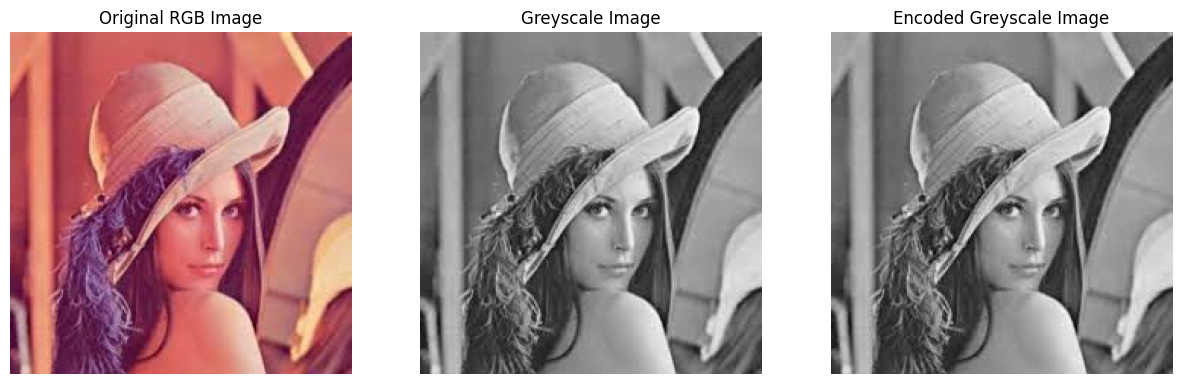

In [24]:
import matplotlib.pyplot as plt
# Display the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image)
axs[0].set_title('Original RGB Image')
axs[0].axis('off')

axs[1].imshow(greyscale_image, cmap='gray')
axs[1].set_title('Greyscale Image')
axs[1].axis('off')

axs[2].imshow(encoded_image, cmap='gray')
axs[2].set_title('Encoded Greyscale Image')
axs[2].axis('off')

plt.show()